###### Importing the Libraries

In [26]:
# for Mathematical Operations
import numpy as np

# for dataframe Operations
import pandas as pd

# for datetime manipulations
import datetime as dt

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for RFM Analysis
from lifetimes.plotting import *
from lifetimes.utils import *

###### Preparing the Dataset

In [27]:
# lets read the Data set
df = pd.read_excel('Online Retail.xlsx')

# print the shape of the dataset
print("Shape of the Dataset :", df.shape)

Shape of the Dataset : (541909, 8)


In [28]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [29]:
# lets check the head of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
# Preparing the Dataset for Calculating the Customer Lifetime Value

# converting the Date Column into a Date-time Object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

# Removing all the Records where customer ID is not given
df = df[pd.notnull(df['CustomerID'])]

# Removing all the Customer where is the Quantity of Items is 0 or Negative
df = df[(df['Quantity']>0)]

# Creating a New Feature Sales to Perform RFM Analysis
df ['Sales'] = df['Quantity'] * df['UnitPrice']

# Considering only those columns which are important for the analysis
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
df = df[cols_of_interest]

# Lets check the head of the dataset
df.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [31]:
# Getting some more Insights from the Dataset

print("Number of Unique Customers :", df['CustomerID'].nunique())
print("Insights on Sales")
print('---------------------')
print("Minimum Sales :", df['Sales'].min())
print("Average Sales :", df['Sales'].mean())
print("Maximum Sales :", df['Sales'].max())
print("Insights on Date")
print("---------------------")
print("First Date :", df['InvoiceDate'].min())
print("Last Date :", df['InvoiceDate'].max())

Number of Unique Customers : 4339
Insights on Sales
---------------------
Minimum Sales : 0.0
Average Sales : 22.394748504739596
Maximum Sales : 168469.6
Insights on Date
---------------------
First Date : 2010-12-01
Last Date : 2011-12-09


###### CLV Model

* **Frequency** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases.

* **T** represents the age of the customer in whatever time units chosen (daily, in our dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.

* **Recency** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

In [32]:
# Now lets calcuate the Frequency, Recency, and Time using the summary-data-from-transaction function

# We have to specify sales as Monetary value and Observation period end as the last date
data = summary_data_from_transaction_data(df, 'CustomerID', 
                                           'InvoiceDate',
                                            monetary_value_col='Sales',
                                            observation_period_end='2011-12-9')

# lets check the head of the dataset
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [33]:
# Lets check the Stats about the New Data Created

print("Insights on Frequency")
print("-------------------------------")
print("Minimum Value of Frequency :", data['frequency'].min())
print("Average Value of Frequency :", data['frequency'].mean())
print("Maximum Value of Frequency :", data['frequency'].max())

print("Insights on Recency")
print("-------------------------------")
print("Minimum Value of Recency :", data['recency'].min())
print("Average Value of Recency :", data['recency'].mean())
print("Maximum Value of Recency :", data['recency'].max())

print("Insights on Duration of Customer(T)")
print("-------------------------------")
print("Minimum Value of Duration of Customer :", data['T'].min())
print("Average Value of Duration of Customer :", data['T'].mean())
print("Maximum Value of Duration of Customer :", data['T'].max())

print("Insights on Monetary Value")
print("-------------------------------")
print("Minimum Value of Monetary Value :", data['monetary_value'].min())
print("Average Value of Monetary Value :", data['monetary_value'].mean())
print("Maximum Value of Monetary Value :", data['monetary_value'].max())

Insights on Frequency
-------------------------------
Minimum Value of Frequency : 0.0
Average Value of Frequency : 2.8640239686563724
Maximum Value of Frequency : 131.0
Insights on Recency
-------------------------------
Minimum Value of Recency : 0.0
Average Value of Recency : 130.74141507259736
Maximum Value of Recency : 373.0
Insights on Duration of Customer(T)
-------------------------------
Minimum Value of Duration of Customer : 0.0
Average Value of Duration of Customer : 222.78289928554966
Maximum Value of Duration of Customer : 373.0
Insights on Monetary Value
-------------------------------
Minimum Value of Monetary Value : 0.0
Average Value of Monetary Value : 306.94416755414875
Maximum Value of Monetary Value : 168469.6


In [34]:
# Lets check the Percentage of Customers who have their Frequency, Recency, T and Monetary value as 0

print("Percentage of Customer who Have Frequency value as 0 : {0:.2f}%".format(sum(data['frequency'] == 0)/float(len(data))))
print("Percentage of Customer who Have Recency value as 0 : {0:.2f}%".format(sum(data['recency'] == 0)/float(len(data))))
print("Percentage of Customer who Have Monetary value as 0 : {0:.2f}%".format(sum(data['monetary_value']==0)/float(len(data))))

Percentage of Customer who Have Frequency value as 0 : 0.36%
Percentage of Customer who Have Recency value as 0 : 0.36%
Percentage of Customer who Have Monetary value as 0 : 0.36%


C:\Users\manju\AppData\Local\Temp\ipykernel_16992\3507988211.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['monetary_value'], color = 'black')
C:\Users\manju\AppData\Local\Temp\ipykernel_16992\3507988211.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['recency'], color =

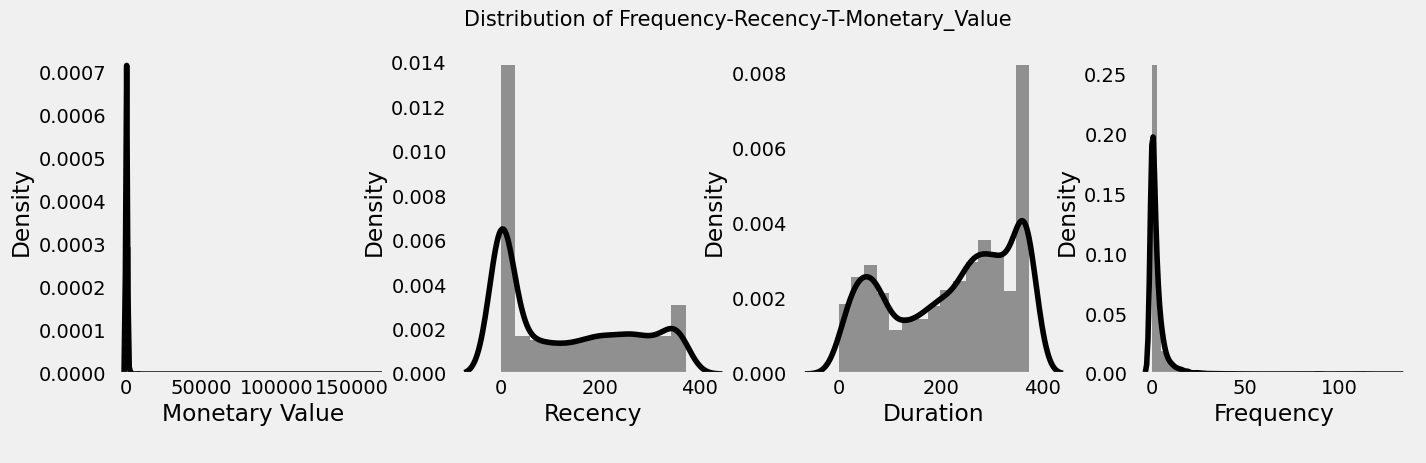

In [35]:
# Lets check the Distribution of the Newly Created Features for RFM Analysis

plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')

plt.subplot(1, 4, 1)
sns.distplot(x=data['monetary_value'], color = 'black')
plt.xlabel('Monetary Value\n')
plt.grid()

plt.subplot(1, 4, 2)
sns.distplot(x=data['recency'], color = 'black')
plt.xlabel('Recency\n')
plt.grid()

plt.subplot(1, 4, 3)
sns.distplot(data['T'], color = 'black')
plt.xlabel('Duration\n')
plt.grid()

plt.subplot(1, 4, 4)
sns.distplot(data['frequency'], color = 'black')
plt.xlabel('Frequency\n')
plt.grid()

plt.suptitle('Distribution of Frequency-Recency-T-Monetary_Value \n', fontsize = 15)
plt.show()

###### Frequency and Recency Analysis

In [36]:
from lifetimes import BetaGeoFitter

# Making a Beta Geo Fitter Model with Penalizer Coefficient as 0.1
bgf = BetaGeoFitter(penalizer_coef=0.1)

# Feeding the Model with Frequency, Recency, and Duration
bgf.fit(data['frequency'], data['recency'], data['T'])

# lets Check the Model Parameters
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 49.41, b: 0.00, r: 0.59>


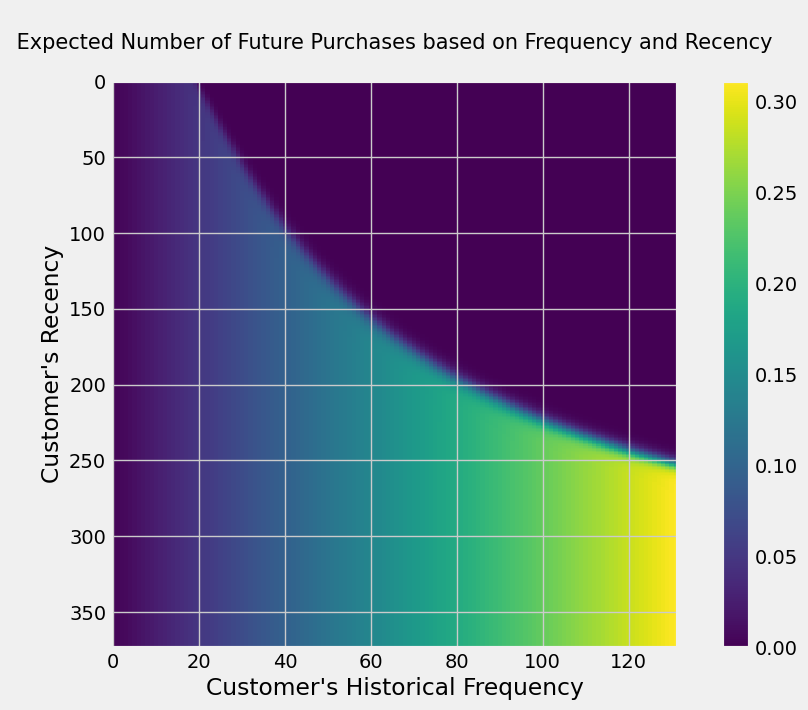

In [37]:
from lifetimes.plotting import plot_frequency_recency_matrix

plt.rcParams['figure.figsize'] = (10, 7)

# Lets plot the Recency vs Frequency Matrix
plot_frequency_recency_matrix(bgf)
plt.title("\n Expected Number of Future Purchases based on Frequency and Recency \n", fontsize = 15)
plt.show()

###### Estimating Customer's Liveliness

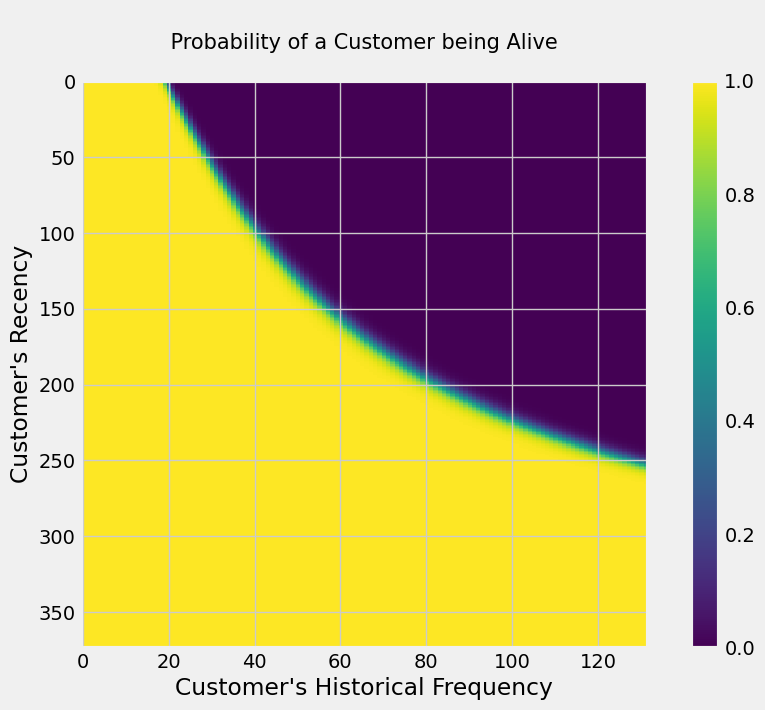

In [39]:
from lifetimes.plotting import plot_probability_alive_matrix

plt.rcParams['figure.figsize'] = (10, 7)

# lets plot the probability of alive Matrix
plot_probability_alive_matrix(bgf)
plt.title("\n Probability of a Customer being Alive \n", fontsize = 15)
plt.show()

In [40]:
# Lets Predict the Purchases of the Customers for Future

# we will set the time value as 1 and again use a predefined function from beta geo fitter
# we are using the conditional expected no. of purachases upto time function for doing this
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                                                      data['frequency'],
                                                                                      data['recency'],
                                                                                      data['T'])
# lets check the Tail of the Dataset
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,88.0,372.0,373.0,135.890114,0.209731
15311.0,89.0,373.0,373.0,677.729438,0.212099
17841.0,111.0,372.0,373.0,364.452162,0.264180
12748.0,113.0,373.0,373.0,298.360885,0.268915
14911.0,131.0,372.0,373.0,1093.661679,0.311527


###### Testing the Model

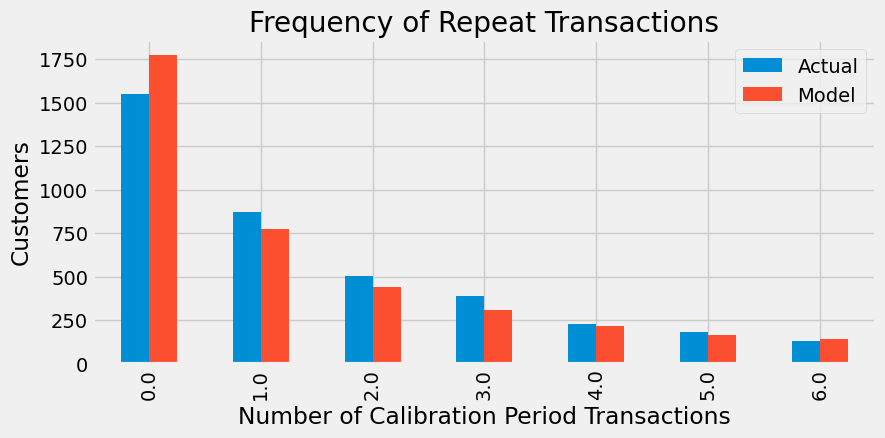

In [42]:
from lifetimes.plotting import plot_period_transactions

# lets plot the Perid Transactions
plt.rcParams['figure.figsize'] = (9, 4)
plot_period_transactions(bgf)
plt.show()

In [43]:
from lifetimes.utils import calibration_and_holdout_data

# lets create the calibration and holdout dataset
summary_cal_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate',
                                        calibration_period_end='2011-06-08',
                                        observation_period_end='2011-12-9' )  

# lets check the head of the calibration and holdout dataset
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,141.0,0.0,184.0
12347.0,2.0,121.0,183.0,4.0,184.0
12348.0,2.0,110.0,174.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0
12352.0,3.0,34.0,112.0,3.0,184.0


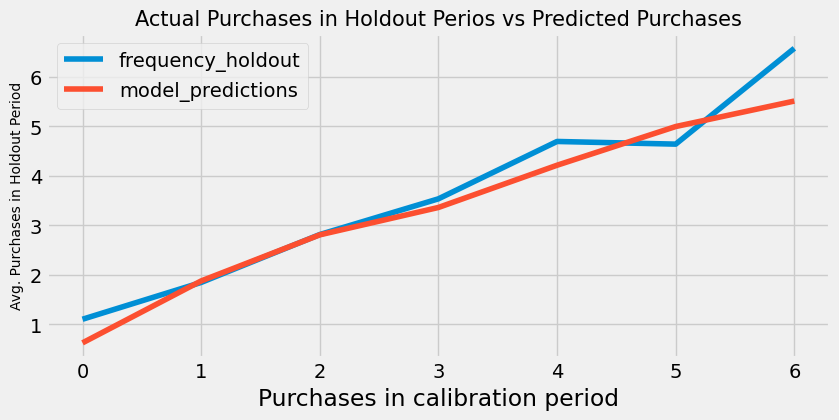

In [44]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

import warnings
warnings.filterwarnings('ignore')

# lets fit the calibration and holdout data
bgf.fit(summary_cal_holdout['frequency_cal'], 
        summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])

# lets plot the Actual Purchases in Holdout Period vs Predicted Purches
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)
plt.ylabel('Avg. Purchases in Holdout Period', fontsize = 10)
plt.title('Actual Purchases in Holdout Perios vs Predicted Purchases', fontsize = 15)
plt.show()

In [45]:
# lets do some REal time Predictions

# Lets Do a Prediction for the CustomerID NO. 12347
t = 10
individual = data.loc[12347]
print("Purchase Prediction for Customer ID: 12347: ", bgf.predict(t, individual['frequency'], 
                                                individual['recency'], individual['T']))

# Lets do one more Prediction on Customer ID No. 12346
t = 10
individual = data.loc[12346]
print("Purchase Prediction for Customer ID: 12346: ", bgf.predict(t, individual['frequency'], 
                                                individual['recency'], individual['T']))

Purchase Prediction for Customer ID: 12347:  0.15929394518540582
Purchase Prediction for Customer ID: 12346:  0.013746953063130429


###### Estimating Customer's Lifetime Value

In [47]:
# Lets Summarize the Data for Returning Customers
returning_customers_summary = data[data['frequency']>0]

print("\nNumber of Returning Customers :", len(returning_customers_summary))
print('--------------------------------------')
print(returning_customers_summary.head())


Number of Returning Customers : 2790
--------------------------------------
            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12347.0           6.0    365.0  367.0      599.701667             0.015834
12348.0           3.0    283.0  358.0      301.480000             0.008820
12352.0           6.0    260.0  296.0      368.256667             0.019089
12356.0           2.0    303.0  325.0      269.905000             0.006927
12358.0           1.0    149.0  150.0      683.200000             0.007991


In [48]:
from lifetimes import GammaGammaFitter

# lets Make a Model for Gamma Gamma Fitter
ggf = GammaGammaFitter(penalizer_coef = 0)

# lets fit the Data onto this Model
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

# lets print the Model Coefficients
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [49]:
# lets Predict the Future Purchases or Customer Lifetime of Our Customers
x = ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value'])

# lets print the Head of the Prediction
print("Customer Lifetime Predictions")
x.head()

Customer Lifetime Predictions


CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
dtype: float64